In [1]:
import sys
import subprocess

# Install required packages for BigQuery pandas integration
subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'db-dtypes', 'pyarrow'])

print('✅ Required packages installed!')

  Using cached db_dtypes-1.4.3-py3-none-any.whl.metadata (3.0 kB)
  Using cached pyarrow-21.0.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (3.3 kB)
Using cached db_dtypes-1.4.3-py3-none-any.whl (18 kB)
Using cached pyarrow-21.0.0-cp312-cp312-manylinux_2_28_x86_64.whl (42.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [db-dtypes]
✅ Required packages installed!


# BigQuery GSOD Weather Data Analysis

This notebook queries the Global Summary of the Day (GSOD) dataset from BigQuery public data.

In [2]:
import os
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
from google.oauth2 import credentials
import warnings
warnings.filterwarnings('ignore')

# Set up plotting
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 8)

print('✅ Packages imported successfully!')

✅ Packages imported successfully!


In [3]:
def get_access_token():
    try:
        result = subprocess.run(
            ['coder', 'external-auth', 'access-token', 'gcp'],
            capture_output=True,
            text=True,
            check=True
        )
        return result.stdout.strip()
    except subprocess.CalledProcessError as e:
        print(f'Error: {e}')
        return None

# Get access token and create BigQuery client
access_token = get_access_token()
if access_token:
    print('✅ Access token obtained')
    creds = credentials.Credentials(token=access_token)
    client = bigquery.Client(credentials=creds, project='coder-vertex-demos')
    print('✅ BigQuery client ready')
else:
    print('❌ Failed to get access token')

✅ Access token obtained
✅ BigQuery client ready


In [4]:
# Query the GSOD dataset
query = '''
SELECT * 
FROM `bigquery-public-data.samples.gsod` 
LIMIT 500
'''

print('🔍 Executing BigQuery query...')
df = client.query(query).to_dataframe()
print(f'✅ Retrieved {len(df)} rows')
print(f'📋 Columns: {list(df.columns)}')

df.head()

🔍 Executing BigQuery query...
✅ Retrieved 500 rows
📋 Columns: ['station_number', 'wban_number', 'year', 'month', 'day', 'mean_temp', 'num_mean_temp_samples', 'mean_dew_point', 'num_mean_dew_point_samples', 'mean_sealevel_pressure', 'num_mean_sealevel_pressure_samples', 'mean_station_pressure', 'num_mean_station_pressure_samples', 'mean_visibility', 'num_mean_visibility_samples', 'mean_wind_speed', 'num_mean_wind_speed_samples', 'max_sustained_wind_speed', 'max_gust_wind_speed', 'max_temperature', 'max_temperature_explicit', 'min_temperature', 'min_temperature_explicit', 'total_precipitation', 'snow_depth', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado']


,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,36010,99999,1929,12,6,49.500000,4,47.500000,4,983.200012,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
1,36010,99999,1929,10,7,53.200001,4,49.099998,4,1002.299988,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
2,38940,99999,1929,10,14,53.000000,4,50.700001,4,1030.699951,...,NaN,<NA>,0.0,NaN,False,False,False,False,False,False
3,33790,99999,1929,10,18,46.799999,4,41.500000,4,1009.200012,...,NaN,<NA>,0.0,NaN,False,False,False,False,False,False
4,30750,99999,1929,11,24,46.700001,4,43.200001,4,989.000000,...,NaN,<NA>,0.0,NaN,False,False,False,False,False,False


In [5]:
# Dataset info
print('📈 Dataset info:')
df.info()

📈 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   station_number                      500 non-null    Int64  
 1   wban_number                         500 non-null    Int64  
 2   year                                500 non-null    Int64  
 3   month                               500 non-null    Int64  
 4   day                                 500 non-null    Int64  
 5   mean_temp                           500 non-null    float64
 6   num_mean_temp_samples               500 non-null    Int64  
 7   mean_dew_point                      338 non-null    float64
 8   num_mean_dew_point_samples          338 non-null    Int64  
 9   mean_sealevel_pressure              437 non-null    float64
 10  num_mean_sealevel_pressure_samples  437 non-null    Int64  
 11  mean_station_pressure        

In [6]:
# Statistical summary
print('🔢 Statistical summary:')
df.describe()

🔢 Statistical summary:


,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,min_temperature,total_precipitation,snow_depth
count,500.0,500.0,500.0,500.0,500.0,500.000000,500.0,338.000000,338.0,437.000000,...,482.000000,482.0,490.000000,490.0,488.000000,0.0,500.000000,0.0,343.000000,0.0
mean,158442.622,97720.786,1932.226,6.744,16.038,46.325200,5.21,44.946154,4.846154,1014.568878,...,7.090249,5.242739,9.583061,4.989796,14.237705,NaN,39.997000,NaN,0.034344,NaN
std,186835.481667,12967.520309,1.347053,3.585551,8.75064,17.014803,3.871935,9.553094,3.156642,11.816216,...,6.402784,3.937294,6.509092,3.302397,8.713471,NaN,17.409555,NaN,0.128732,NaN
min,30050.0,23119.0,1929.0,1.0,1.0,-41.799999,4.0,4.200000,4.0,975.299988,...,0.000000,4.0,0.000000,4.0,1.900000,NaN,-49.000000,NaN,0.000000,NaN
25%,36010.0,99999.0,1931.0,3.0,9.0,40.200001,4.0,38.050000,4.0,1007.299988,...,3.325000,4.0,4.500000,4.0,8.900000,NaN,34.224999,NaN,0.000000,NaN
50%,39530.0,99999.0,1933.0,7.0,16.0,48.500000,4.0,45.250000,4.0,1015.200012,...,5.600000,4.0,8.200000,4.0,13.000000,NaN,43.000000,NaN,0.000000,NaN
75%,284930.0,99999.0,1933.0,10.0,24.0,57.500000,5.0,52.000000,4.0,1021.799988,...,9.300000,5.0,13.275000,5.0,18.100000,NaN,51.099998,NaN,0.020000,NaN
max,990061.0,99999.0,1934.0,12.0,31.0,85.000000,24.0,65.900002,24.0,1044.599976,...,82.699997,24.0,35.400002,24.0,43.900002,NaN,70.000000,NaN,1.500000,NaN


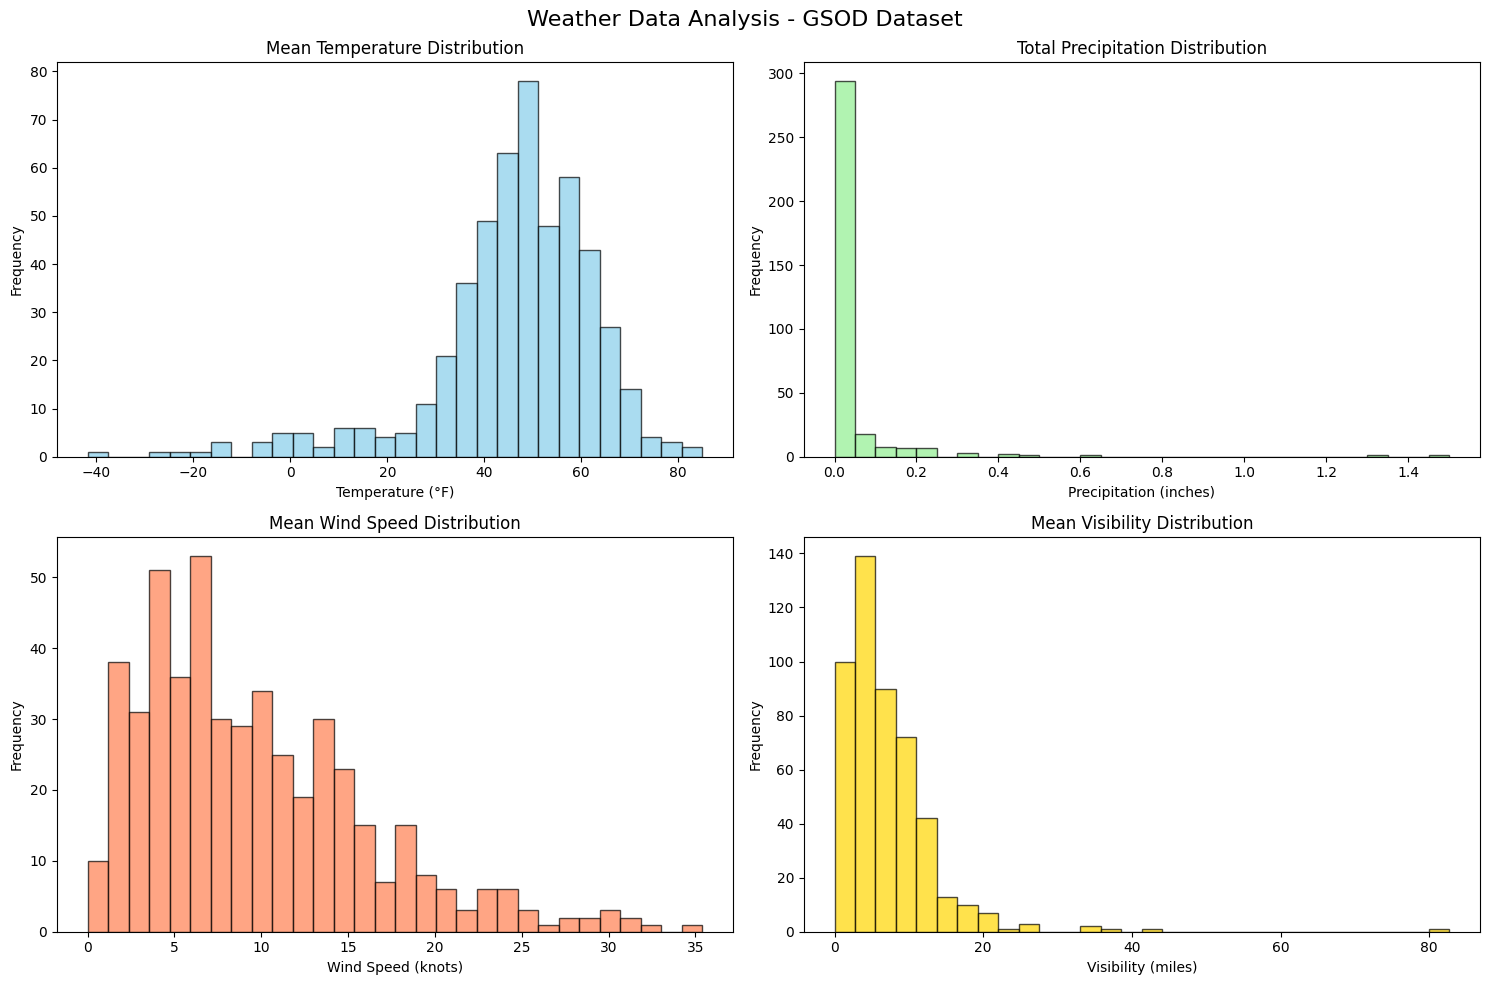

In [7]:
# Create weather visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Weather Data Analysis - GSOD Dataset', fontsize=16)

# Temperature
if 'mean_temp' in df.columns:
    temp_clean = df[df['mean_temp'].notna()]['mean_temp']
    axes[0,0].hist(temp_clean, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,0].set_title('Mean Temperature Distribution')
    axes[0,0].set_xlabel('Temperature (°F)')
    axes[0,0].set_ylabel('Frequency')

# Precipitation
if 'total_precipitation' in df.columns:
    prcp_clean = df[df['total_precipitation'].notna()]['total_precipitation']
    axes[0,1].hist(prcp_clean, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0,1].set_title('Total Precipitation Distribution')
    axes[0,1].set_xlabel('Precipitation (inches)')
    axes[0,1].set_ylabel('Frequency')

# Wind Speed
if 'mean_wind_speed' in df.columns:
    wind_clean = df[df['mean_wind_speed'].notna()]['mean_wind_speed']
    axes[1,0].hist(wind_clean, bins=30, alpha=0.7, color='coral', edgecolor='black')
    axes[1,0].set_title('Mean Wind Speed Distribution')
    axes[1,0].set_xlabel('Wind Speed (knots)')
    axes[1,0].set_ylabel('Frequency')

# Visibility
if 'mean_visibility' in df.columns:
    vis_clean = df[df['mean_visibility'].notna()]['mean_visibility']
    axes[1,1].hist(vis_clean, bins=30, alpha=0.7, color='gold', edgecolor='black')
    axes[1,1].set_title('Mean Visibility Distribution')
    axes[1,1].set_xlabel('Visibility (miles)')
    axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

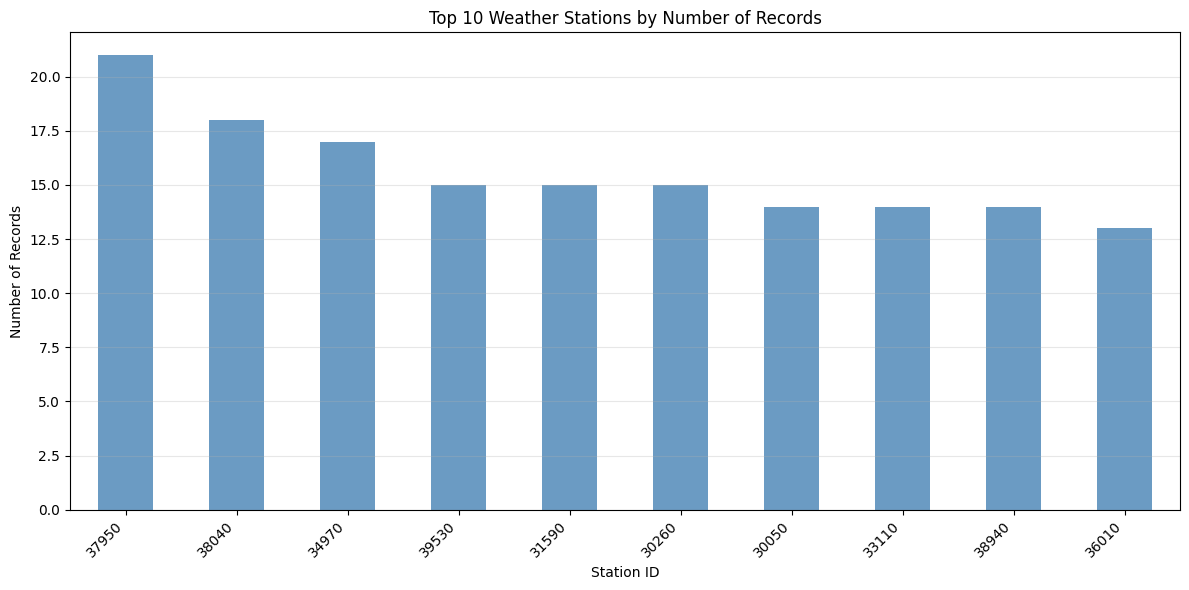

📡 Total unique stations: 82
🏆 Top 10 stations:
 1. Station 37950: 21 records
 2. Station 38040: 18 records
 3. Station 34970: 17 records
 4. Station 39530: 15 records
 5. Station 31590: 15 records
 6. Station 30260: 15 records
 7. Station 30050: 14 records
 8. Station 33110: 14 records
 9. Station 38940: 14 records
10. Station 36010: 13 records

✅ Weather data analysis complete!


In [8]:
# Weather stations analysis
if 'station_number' in df.columns:
    top_stations = df['station_number'].value_counts().head(10)
    
    plt.figure(figsize=(12, 6))
    top_stations.plot(kind='bar', color='steelblue', alpha=0.8)
    plt.title('Top 10 Weather Stations by Number of Records')
    plt.xlabel('Station ID')
    plt.ylabel('Number of Records')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f'📡 Total unique stations: {df["station_number"].nunique()}')
    print('🏆 Top 10 stations:')
    for i, (station, count) in enumerate(top_stations.items(), 1):
        print(f'{i:2d}. Station {station}: {count} records')

print('\n✅ Weather data analysis complete!')